# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import base64
import io
import plotly.figure_factory as ff


In [5]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [6]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [7]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

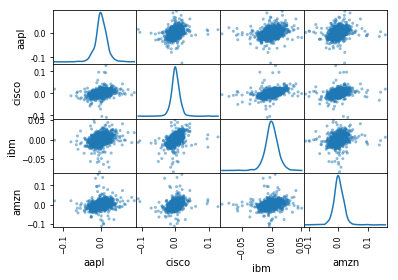

In [78]:
import io
scatter_matrix(stocks.pct_change(1),diagonal='kde');
img = io.BytesIO()
plt.savefig(img, format='png')
img.seek(0)
plot_url = base64.b64encode(img.getvalue())

In [80]:
plot_url

b'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXeUXWd97/3Z+/Q+Z+ZM1xTNqPcuS8iWbGQwBhtDgNjUJIADzn0v4ebmXTfLIYn/8AoJayXXSYDYl5JwX4oxxQVDABvbWLZk9d6naHo5vZ9d3z/2zJFGmpFmpCNN0f6s5eU5bZ/nbO39/J7nV74/Qdd1HRMTExMTk1mGON0DMDExMTExuR5MA2ZiYmJiMisxDZiJiYmJyazENGAmJiYmJrMS04CZmJiYmMxKTANmYmJiYjIrMQ2YiYmJicmsxDRgJiYmJiazEtOAmZiYmJjMSkwDZmJiYmIyKzENmImJiYnJrMQ0YCYmJiYmsxLTgJmYmJiYzEpMA2ZiYmJiMisxDZiJiYmJyazENGAmJiYmJrMS04CZmJiYmMxKTANmYmJiYjIrMQ2YiYmJicmsxDRgJiYmJiazEtOAmZiYmJjMSkwDZmJiYmIyKzENmImJiYnJrMQ0YCYmJiYmsxLTgJmYmJiYzEpMA2ZiYmJiMisxDZiJiYmJyazENGAmJiYmJrMS04CZmJiYmMxKTANmYmJiYjIrMQ2YiYmJicmsxDRgJiYmJiazEtOAmZiYmJjMSkwDZmJiYmIyK7FO9wBuFqFQiObm5ukexpyhs7NzRp7PjKSQzisA+F02XDbLNI/o2szUc3kziWYkZFVDQCDksyMKQsmOPZPPp6LpRNIFABxWC2Vu2zSP6Np0dnYSDoenexiTYs4asObmZvbv3z/dw5gymqbztd+cweuw8tiOVoQS3ug3woYNG2bE+VQ1nReP9NIXz3P34ipEEX51bACAD62tpznkmeYRXpuZci6ngqxqPH+ol6FUgfcur2ZBlW9Kn//F0T7ODaZx2y388bvmY7eWzvkzk89npqDwH293Iikaq+YFePfSagB+fWKAc4

In [75]:
!pip install StringIO


  Could not find a version that satisfies the requirement StringIO (from versions: )
No matching distribution found for StringIO
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Simulating Thousands of Possible Allocations

In [9]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


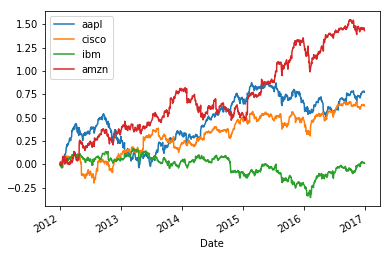

In [10]:
stock_normed = np.log(stocks/stocks.iloc[0])

stock_normed.plot()

In [14]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [15]:
stocks/stocks.shift(1)

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,1.005374,1.019324,0.995921,0.991510
2012-01-05,1.011102,0.996314,0.995257,1.000563
2012-01-06,1.010454,0.996300,0.988519,1.028152
2012-01-09,0.998414,1.006366,0.994796,0.977822
2012-01-10,1.003580,0.992620,0.998458,1.004368
2012-01-11,0.998370,1.012746,1.005571,0.997547
2012-01-12,0.997255,1.004195,0.990292,0.983399
2012-01-13,0.996251,0.995300,0.992301,1.014153


In [16]:
log_ret = np.log(stocks/stocks.shift(1))
#log_ret.head()
#np.log(stocks/stocks.shift(1)).hist(bins=100)


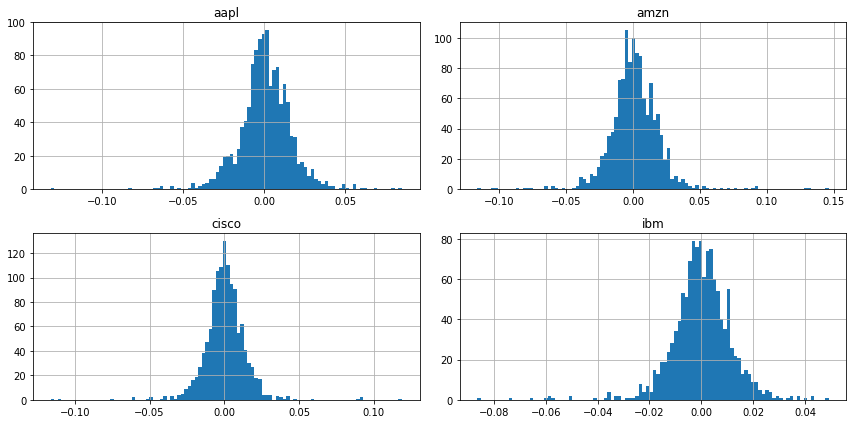

In [86]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [120]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [18]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [121]:
# Compute pairwise covariance of columns
np.sqrt(log_ret.cov())

,aapl,cisco,ibm,amzn
aapl,0.016466,0.008417,0.007576,0.008680
cisco,0.008417,0.014279,0.008458,0.008899
ibm,0.007576,0.008458,0.011819,0.007699
amzn,0.008680,0.008899,0.007699,0.019362


In [126]:
log_ret.std()

aapl     0.016466
cisco    0.014279
ibm      0.011819
amzn     0.019362
dtype: float64

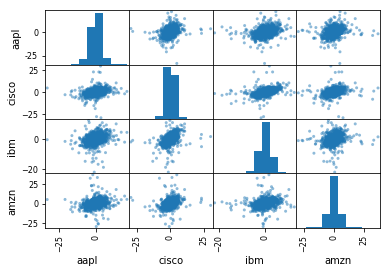

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_ret*252);

In [24]:
log_ret.cov()*252 # multiply by days
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


## Single Run for Some Random Allocation

In [13]:
stocks = df.copy()
stocks/stocks.shift(1)-1

NameError: name 'df' is not defined

In [53]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[ 0.51639863  0.57066759  0.02847423  0.17152166]


Rebalance to sum to 1.0
[ 0.40122278  0.44338777  0.02212343  0.13326603]


Expected Portfolio Return
0.155992720496


Expected Volatility
0.185026495659


Sharpe Ratio
0.843083148393


Great! Now we can just run this many times over!

In [60]:
num_ports = 1000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(stocks.columns)))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [61]:

len(all_weights)

1000

In [62]:
sharpe_arr.max()

1.0205694076857244

In [63]:
maxidx = sharpe_arr.argmax()
max_sr_ret = ret_arr[maxidx]
max_sr_vol = vol_arr[maxidx]

## Plotting the data

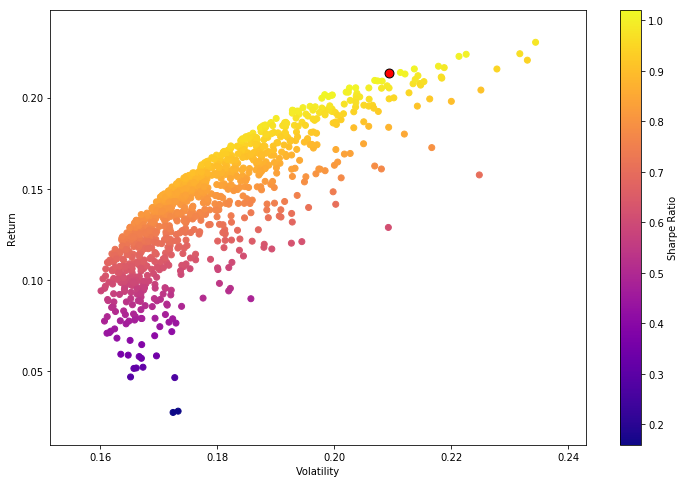

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=80,edgecolors='black');

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [48]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array of return, volatility, sharpe ratio.
    assumes data is daily - conversion 252
    """
    log_ret = np.log(stocks/stocks.shift(1))
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [49]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [50]:
def neg_sharpe(weights):
    ''' Given some weights we calculate the sharp ratio. Since this is a minimization problem. we express
        the negative result
    '''
    return  get_ret_vol_sr(weights)[2] * -1

In [51]:
# Contraints - on the the input weights
def check_sum(weights):
    '''
    Returns 0 (ok) if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [52]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [53]:
opt_results

     fun: -1.0307168703356058
     jac: array([  5.64306974e-05,   4.18573618e-05,   3.39921728e-01,
        -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([  2.66289763e-01,   2.04189829e-01,   8.43712578e-17,
         5.29520408e-01])

In [24]:
opt_results.x

array([  2.66289763e-01,   2.04189829e-01,   8.43712578e-17,
         5.29520408e-01])

In [54]:
get_ret_vol_sr(opt_results.x)

array([ 0.21885915,  0.21233683,  1.03071687])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [55]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,10) # Change 100 to a lower number for slower computers!

In [56]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [57]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

In [58]:
print(len(vol_arr))
print(len(ret_arr))
print(len(sharpe_arr))
print(len(frontier_volatility))
print(len(frontier_y))

1000
1000
1000
10
10


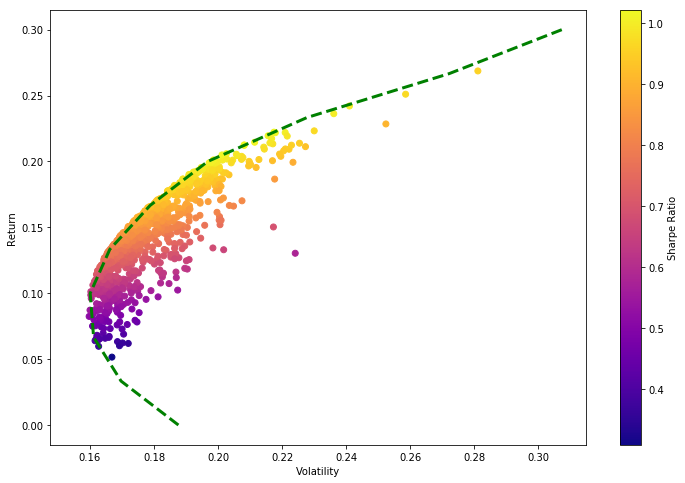

In [59]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3);

In [84]:
help(ff.create_scatterplotmatrix)

Help on function create_scatterplotmatrix in module plotly.figure_factory._scatterplot:

create_scatterplotmatrix(df, index=None, endpts=None, diag='scatter', height=500, width=500, size=6, title='Scatterplot Matrix', colormap=None, colormap_type='cat', dataframe=None, headers=None, index_vals=None, **kwargs)
    Returns data for a scatterplot matrix.
    
    :param (array) df: array of the data with column headers
    :param (str) index: name of the index column in data array
    :param (list|tuple) endpts: takes an increasing sequece of numbers
        that defines intervals on the real line. They are used to group
        the entries in an index of numbers into their corresponding
        interval and therefore can be treated as categorical data
    :param (str) diag: sets the chart type for the main diagonal plots.
        The options are 'scatter', 'histogram' and 'box'.
    :param (int|float) height: sets the height of the chart
    :param (int|float) width: sets the width of th

# Great Job!